In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Data Analyst Nanodegree
##Project 5: Identifying Fraud from Enron Email

###1.0 Introduction

This document presents the results of Project 5: Identifying Fraud from Enron Email for the Udacity Data Science Nanodegree. This assessment required the student to 'play detective', and put machine learning skills to use by building an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

###2.0 Background

####Enron Fraud

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives. In this project, you will play detective, and put your new skills to use by building a person of interest identifier based on financial and email data made public as a result of the Enron scandal. To assist you in your detective work, we've combined this data with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement, or plea deal with the government, or testified in exchange for prosecution immunity.

####Goal of the Project

The goal of this assessment is to build a predictive model which is able to identify and label Enron employee's as a Person of Interst (POI). By assigning a label of POI, the employee is said to have committed fraud. In order to achieve this goal, machine learning practices are employed in order to generate predictions of POI’s based on an existing employee dataset. The dataset for this assessment was made public through Case No. 01-16034 of the Southern District of New York US District Court. The data includes financial features for each employee such as salaries and bonus payouts, as well as email features such as who the employee has sent/received emails to/from.

###3.0 Data

####Original Dataset

Resources (incl. dataset) can be found on the Udacity Github repo: [ud120-projects.git](https://github.com/udacity/ud120-projects.git)

Features in the data fall into three major types, namely financial features, email features and POI labels. 
* Financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars) 
* Email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)
* POI label: [‘poi’] (boolean, represented as integer)

####Data Pre-Processing 

In [2]:
#!/usr/bin/python

import pickle
import pandas

#Load data dict.
data_dict = pickle.load(open("data/final_project_dataset.pkl", "r"))

#Total data points
points = len(data_dict.keys())

#POI count
poi_count = 0
for k in data_dict:
   if data_dict[k]["poi"] == 1:
       poi_count += 1
        
#Features per person
perfeat = len(data_dict[data_dict.keys()[0]].keys())

#Data head
df = pandas.DataFrame.from_dict(data_dict, orient = 'index')
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


Some initial probing of the dataset revealed that there are 146 total records (people) and 18 POI. For each person in the dataset, there are 21 features available. As part of the pre-processing routine, an investigation for outliers and data anomaly was conducted. Visual representations of features were used in order to identify extreme outliers.

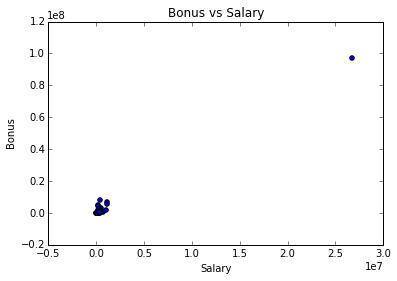

In [3]:
#!/usr/bin/python

import sys
import pickle
import matplotlib.pyplot as plt
sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline

#Load data dict.
data_dict = pickle.load(open("data/final_project_dataset.pkl", "r"))

#Retrieve formatted features
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
labels, features = targetFeatureSplit(data)

# Plot bonus vs salary
for point in data:
   salary = point[0]
   bonus = point[1]
   plt.scatter( salary, bonus )

plt.title("Bonus vs Salary")
plt.xlabel("Salary")
plt.ylabel("Bonus")

In [4]:
import pickle
from pprint import pprint

#Load data dict.
data_dict = pickle.load(open("data/final_project_dataset.pkl", "r"))

outlier = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outlier.append((key,int(val)))

pprint(sorted(outlier,key=lambda x:x[1],reverse=True)[:2])

[('TOTAL', 26704229), ('SKILLING JEFFREY K', 1111258)]


A plot of 'bonus' and 'salary' features showed an extreme outlier. Upon further investigation, the extreme outlier was found be related to a 'TOTAL' entry, which represents the sum for each each feature within the financial dataset. As such, this entry was removed from the dataset and the outlier assessment repeated.

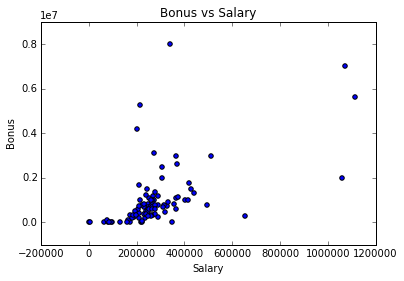

In [5]:
#!/usr/bin/python

import sys
import matplotlib.pyplot as plt
sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline

#Load data dict.
data_dict = pickle.load(open("data/final_project_dataset.pkl", "r"))

#Drop 'TOTAL'
data_dict.pop('TOTAL',0)

#Retrieve formatted features
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
labels, features = targetFeatureSplit(data)

# Plot bonus vs salary
for point in data:
   salary = point[0]
   bonus = point[1]
   plt.scatter( salary, bonus )

plt.title("Bonus vs Salary")
plt.xlabel("Salary")
plt.ylabel("Bonus")

In [6]:
import pickle
from pprint import pprint

#Load data dict.
data_dict = pickle.load(open("data/final_project_dataset.pkl", "r"))

#Drop 'TOTAL'
data_dict.pop('TOTAL',0)

outlier = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outlier.append((key,int(val)))

pprint(sorted(outlier,key=lambda x:x[1],reverse=True)[:2])

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]


Two outliers remain, 'SKILLING JEFFREY K' and 'LAY KENNETH L'. However both are be retained as part of the pre-processed dataset since they are POI candidates.

In [7]:
#!/usr/bin/python

import pickle
import pandas
import numpy

data_dict = pickle.load( open("data/final_project_dataset.pkl", "r") )

df = pandas.DataFrame.from_dict(data_dict, orient = 'index')


#Replace 'NaN' and 'inf' strings with 0's
replace = ['NaN', 'inf', '-inf']

for i in replace:
    df = df.replace(i, 0)

    
#Return empty index
emptyindex = numpy.where(~df.any(axis = 1))[0]
#print "Empty index:"
#for i in emptyindex:
    #print df.iloc[i]

    
#Drop 'TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E'
drop = ['TOTAL', 
    'THE TRAVEL AGENCY IN THE PARK',
    'LOCKHART EUGENE E']


#Drop 'email address' feature
for i in drop:
    df = df.drop(i, axis = 0)

df = df.drop('email_address', axis = 1)


#List email features
feat_email = numpy.array(['from_messages',
    'to_messages',
    'shared_receipt_with_poi', 
    'from_this_person_to_poi',
    'from_poi_to_this_person',
    'email_address'])


#List financial features
feat_financial = numpy.array(['salary',
    'deferral_payments',
    'total_payments',
    'exercised_stock_options', 
    'bonus',
    'restricted_stock',
    'restricted_stock_deferred',
    'total_stock_value',
    'expenses',
    'loan_advances',
    'other',
    'director_fees',
    'deferred_income', 
    'long_term_incentive'])

In addition to the 'TOTAL' feature mentioned above, 'THE TRAVEL AGENCY IN THE PARK' was also removed as it was found to refer to an entity rather than a person, and ‘LOCKHART EUGENE E’ was removed this entry had missing data for all data features. As a final step in the pre-processing routine, 'NaN', 'inf' and '-inf' strings were replaces with zero values, and any records with all missing data were dropped.

###4.0: Features

####Additional Features

Prior to performing any form of feature selection, a number of additional features were derived from the existing set.

In [8]:
#!/usr/bin/python

#Make a copy of the pre-processed dataset
df_orig = df.copy(deep = True)
df_addf = df.copy(deep = True)


#Add financial ratio features
feat_payment = ['salary',
    'deferral_payments',
    'bonus',
    'expenses',
    'loan_advances',
    'other',
    'director_fees',
    'deferred_income',
    'long_term_incentive']

feat_stock = ['exercised_stock_options',
    'restricted_stock',
    'restricted_stock_deferred',]

for i in feat_payment:
    df_addf['{0}_{1}_ratio'.format(i, 'total_pay')] = df_addf[i] / df_addf['total_payments']

for i in feat_stock:
    df_addf['{0}_{1}_ratio'.format(i, 'total_stock')] = df_addf[i] / df_addf['total_stock_value']


#Add email ratio features
feat_emailtrans = ['shared_receipt_with_poi',
    'from_this_person_to_poi',
    'from_poi_to_this_person' ]

df_addf['total_poi_interaction'] = df_addf['shared_receipt_with_poi'] +\
    df_addf['from_this_person_to_poi'] +\
    df_addf['from_poi_to_this_person']

for i in feat_emailtrans:
    df_addf['{0}_{1}_ratio'.format(i, 'total_poi_interaction')] = df_addf[i] / df_addf['total_poi_interaction']


#Add squared features
feat_squared = ['total_payments',
    'total_stock_value',
    'exercised_stock_options',
    'salary']

for i in feat_payment:
    df_addf['{0}_squared'.format(i)] = df_addf[i] ** 2
    
for i in feat_stock:
    df_addf['{0}_squared'.format(i)] = df_addf[i] ** 2
    
for i in feat_emailtrans:
    df_addf['{0}_squared'.format(i)] = df_addf[i] ** 2

New features added to a copy of the pre-processed dataset:
* Ratio of payment features: Ratio of each payment feature (i.e. salary, bonus and expenses) to total income. Expect that those individuals which have a greater bonus or expense as a proportion of their total income, are more likely to be poi's.

* Ratio of stock features: Ratio of each stock feature (i.e. stock option value, restricted/deferred stock value) to total stock value. Expect those individuals which have a greater value of stock options as a proportion of their total stock value, are more likely to be poi's.

* Ratio of email features: Ratio of each email feature (i.e. number of shared receipts with poi, number of emails from this person to poi) to total amount of receipts/emails to and from poi. Expect that individuals can be further identified by the relative amount of contact they have had with other poi's and by which means they have had contact.

* Square of features: The square of each existing and newly generated features.

In [9]:
#Replace 'NaN' and 'inf' strings with 0's
replace = ['NaN', 'inf', '-inf']

for i in replace:
    df_addf = df_addf.replace(i, 0)

#Extract POI label
df_label = df['poi']

#Drop POI from dataset and convert new features to floats for MinMaxScaler
feat_orig = df_orig.drop(['poi'], axis = 1).astype(float)
feat_addf = df_addf.drop(['poi'], axis = 1).astype(float)

#Return final list of feature names
feat_list_orig = feat_orig.columns
feat_list_addf = feat_addf.columns

#print feat_list_orig
#print feat_list_addf

As with the original pre-processed dataset, any 'NaN', 'inf' and '-inf' values (which may have been generated as part of the feature creation routine) were replaced with zero values. And finally, the POI feature was dropped from both the original and additional feature datasets with all remaining features converted to floats.

####Optimal Feature Selection

In order to get some insight into the relevancy of the newly added features, the SelectKBest<sup>1</sup> univariate feature selection algorithm was used, with an ANOVA F-value classification for ranking. This alogrithm was applied to both the original and additional feature datasets.

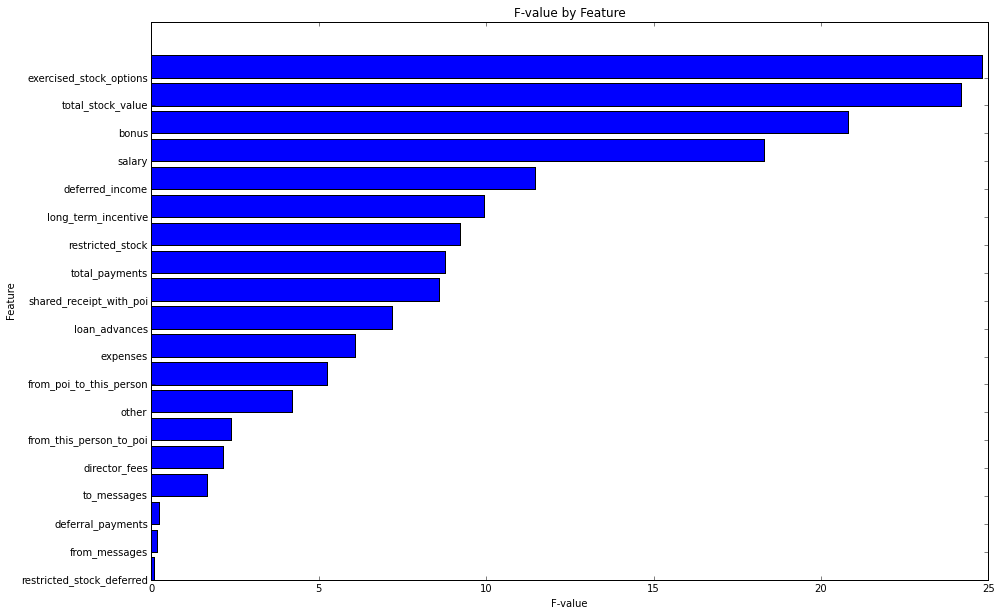

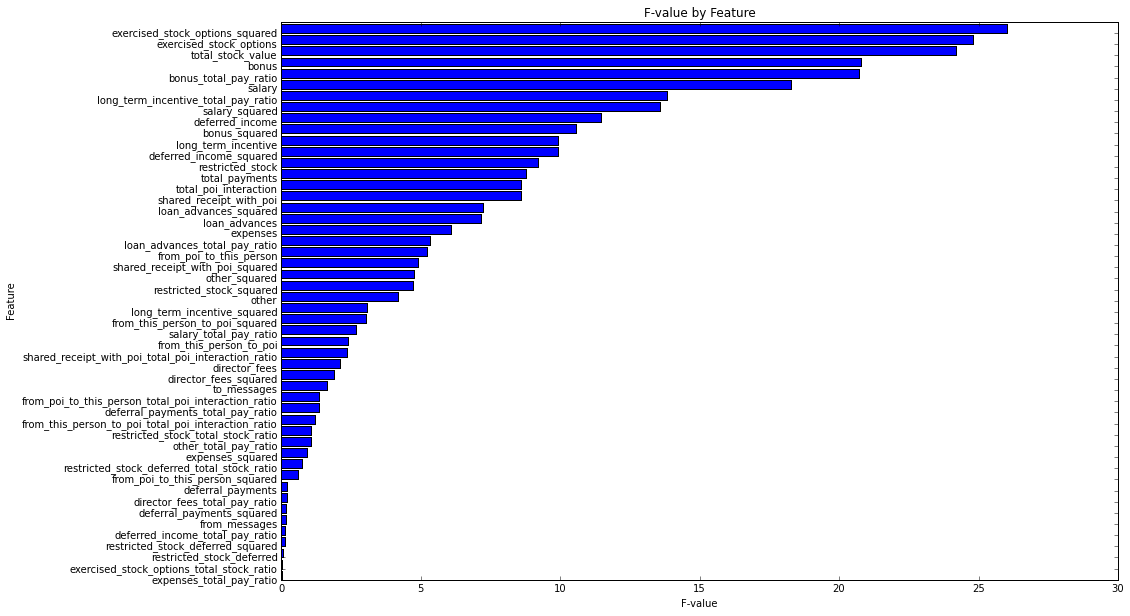

In [10]:
#!/usr/bin/python

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline


feat = [feat_orig, feat_addf]
feat_list = [feat_list_orig, feat_list_addf]

for feat, feat_list in zip(feat, feat_list):
   
    #Score features using KBest and Anova F-value
    kbsel = SelectKBest(k = 'all', score_func = f_classif).fit(feat, df_label)

    #Create tables for the K-best features Anova F-value.
    kbfeat = pandas.DataFrame([feat_list, kbsel.scores_]).T
    kbfeat.columns = ['Feature', 'Anova F-value']
    kbfeat = kbfeat.sort(['Anova F-value'], ascending = True).reset_index(drop = True)

    #Generate vertical bar chart
    y = kbfeat['Feature']
    y_pos = numpy.arange(len(y))
    x = kbfeat['Anova F-value']

    fig = plt.figure(figsize=(15, 10));
    plt.barh(y_pos, x)
    plt.yticks(y_pos, y)
    plt.title("F-value by Feature")
    plt.xlabel("F-value")
    plt.ylabel("Feature")

    #kbfeat.plot(kind = 'barh')

As it can be seen from the above plots, the new features within the additional feature dataset are unable to significantly out-perform any of the original features. 'EXERCISED_STOCK_OPTIONS', 'TOTAL_STOCK_VALUE', 'BONUS' and 'SALARY' are the top performing features in the original dataset, while 'EXERCISED_STOCK_OPTIONS_SQUARED', 'BONUS_TOTAL_PAY_RATIO' within the additional feature dataset perform similarly. As such, the additional feature dataset is dropped from subsequent analysis in order to avoid potential multi-collinearity issues associated with fitting predictive models around similar based features.

In [11]:
import numpy

feat_final_list = numpy.array(['exercised_stock_options',
    'total_stock_value',
    'bonus',
    'salary',
    'deferred_income',
    'long_term_incentive',
    'restricted_stock',
    'total_payments',
    'shared_receipt_with_poi',
    'loan_advances',
    'expenses', #including this will generate 'UserWarning: Features are constant'
    'from_poi_to_this_person', #including this will generate 'UserWarning: Features are constant'
    'other',
    'from_this_person_to_poi',
    'director_fees', #including this will generate 'UserWarning: Features are constant'
    'to_messages',
    'deferral_payments', #including this will generate 'UserWarning: Features are constant'
    'from_messages',
    'restricted_stock_deferred'])

df_final_list = numpy.array(['poi',
    'exercised_stock_options',
    'total_stock_value',
    'bonus',
    'salary',
    'deferred_income',
    'long_term_incentive',
    'restricted_stock',
    'total_payments',
    'shared_receipt_with_poi',
    'loan_advances',
    'expenses', #including this will generate 'UserWarning: Features are constant'
    'from_poi_to_this_person', #including this will generate 'UserWarning: Features are constant'
    'other',
    'from_this_person_to_poi',
    'director_fees', #including this will generate 'UserWarning: Features are constant'
    'to_messages',
    'deferral_payments', #including this will generate 'UserWarning: Features are constant'
    'from_messages',
    'restricted_stock_deferred'])

feat_final = df_orig[feat_final_list]
df_final = df_orig[df_final_list]

###5.0 Estimation

In order to select the optimal set of estimation algorithm for the final predictive model, a GridSearchCV<sup>2</sup> Pipeline was conducted. According to the sklearn documentation, GridSearchCV implements a 'fit' and 'predict' method like any classifier except that the parameters of the classifier used to predict are optimized by cross-validation.

For this analysis, a collection of pre-processors and estimators were added to a list which are able to be passed to the GridSearchCV. Pre-processors and estimators included within the list and their parameter optimization ranges are noted below.

Pre-processors:
* MinMaxScaler<sup>3</sup>()
* SelectKBest(
            'k':[2, 4, 6, 8, 10, 12, 14, 16, 'all']
  )
* KNeighborsClassifier<sup>4</sup>()

Estimators:
* GaussianNB<sup>5</sup>()
* LinearSVC<sup>6</sup>(
            'C':[0.05, 0.025, 0.5, 1, 10, 10^2, 10^4, 10^8],
            'tol':[10^-1, 10^-2, 10^-4, 10^-8],
            'class_weight':['auto']
  )
* DecisionTreeClassifier<sup>7</sup>(
                        'criterion':['gini', 'entropy'],
                        'splitter':['random', 'best'],
                        'max_depth':[None, 2, 4, 6, 8, 10, 15, 20]
  )
* RandomForestClassifier<sup>8</sup>(
                        'n_estimators':[5, 10, 15, 20],
                        'min_samples_split':[2, 3, 4, 5],
                        'random_state':[42]
  )
* LogisticRegression<sup>9</sup>(
                    'C':[0.05, 0.025, 0.5, 1, 10, 10^2, 10^4, 10^8],
                    'tol':[10^-1, 10^-2, 10^-4, 10^-8],
                    'class_weight':['auto']
  )
  
Tuning parameters allows the user to optimize the models performance over desired performance criteria. For example, a certain set of parameters may allow more information to be extracted from a given set of features (varying validation scores as a result) while another set may allow for lower amount of computational processing. In this case GridSearchCV has been set to optimize parameter selection against the F1 score.

In [12]:
#GridSearchCV estimation library

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


def build_clf_list(clf_select):
    ref_list = []
    clf_list = []
    param_list = []

    if 1 in clf_select:
        ref = 'minmax'
        clf = 'MinMaxScaler()'
        param = {}
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )
    
    if 2 in clf_select:
        ref = 'skb'
        clf = 'SelectKBest()'
        param = { 'k':[2, 4, 6, 8, 10, 12, 14, 16, 'all'] }
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )
    
    if 3 in clf_select:
        ref = 'knn'
        clf = 'KNeighborsClassifier()'
        param = {}
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )
    
    if 4 in clf_select:
        ref = 'naive'
        clf = 'GaussianNB()'
        param = {}
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )

    if 5 in clf_select:
        ref = 'linsvc'
        clf = 'LinearSVC()'
        param = { 'C':[0.05, 0.025, 0.5, 1, 10, 10**2, 10**4, 10**8],
            'tol':[10**-1, 10**-2, 10**-4, 10**-8],
            'class_weight':['auto'] }
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )
    
    if 6 in clf_select:
        ref = 'dt'
        clf = 'DecisionTreeClassifier()'
        param = { 'criterion':['gini', 'entropy'],
            'splitter':['random', 'best'],
            'max_depth':[None, 2, 4, 6, 8, 10, 15, 20] }
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )

    if 7 in clf_select:
        ref = 'rf'
        clf = 'RandomForestClassifier()'
        param = { 'n_estimators':[5, 10, 15, 20],
            'min_samples_split':[2, 3, 4, 5],
            'random_state':[42] }
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )

    if 8 in clf_select:
        ref = 'lr'
        clf = 'LogisticRegression()'
        param = { 'C':[0.05, 0.025, 0.5, 1, 10, 10**2, 10**4, 10**8],
            'tol':[10**-1, 10**-2, 10**-4, 10**-8],
            'class_weight':['auto'] }
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )
    
    if 9 in clf_select:
        ref = 'pca'
        clf = 'PCA()'
        param = { 'n_components':[1, 2, 3, 4, 5],
            'whiten':[True, False] }
        ref_list.append( (ref) )
        clf_list.append( (clf) )
        param_list.append( (param) )
    
    return ref_list, clf_list, param_list


def build_pipe(ref, clf, param):
    pipe_ref = []
    pipe_param = {}
    
    pipe_ref.append( (ref, eval(clf)) )
    
    for key, value in param.iteritems():
        pipe_param[ref + "__" + key] = value
    
    return pipe_ref, pipe_param


def build_pipe_list(ref_list, clf_list, param_list):
    import itertools
    
    pipe_ref_list = []
    pipe_param_list = {}
    
    for ref, clf, param in itertools.izip(ref_list, clf_list, param_list):
        pipe_ref, pipe_param = build_pipe(ref, clf, param)
        
        pipe_ref_list.append( (pipe_ref[0][0], pipe_ref[0][1]) ) 
        pipe_param_list.update(pipe_param) 
    
    return pipe_ref_list, pipe_param_list


def optim_clf(clf, param, cv, feat, label):
    from sklearn.grid_search import GridSearchCV
    from sklearn.metrics import make_scorer
    from sklearn.metrics import f1_score
    
    f1score = make_scorer(f1_score)
    
    clf = GridSearchCV(clf, param, scoring = f1score, cv = cv)
    clf = clf.fit(feat, label)
    
    return clf.best_estimator_


def optim_clf_list(clf_list, param_list, cv, feat, label):
    import itertools
    
    clf_list_bestest = []
    
    for clf, param in itertools.izip(clf_list, param_list):
        clf.best_estimator_ = optim_clf(clf, param, cv, feat, label)
        clf_list_bestest.append( (clf.best_estimator_) ) 
    
    return clf_list_bestest


def eval_clf(clf, feat, label): 
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    
    label_pred = clf.predict(feat) 
    
    f1score = f1_score(label, label_pred) 
    recall = recall_score(label, label_pred) 
    precision = precision_score(label, label_pred) 
    
    return f1score, recall, precision


def eval_clf_list(clf_list, feat, label): 
    clf_list_score = []
    
    for clf in clf_list: 
        f1score, recall, precision = eval_clf(clf, feat, label)
        clf_list_score.append( (f1score, recall, precision) ) 
    
    return clf_list_score

Tested pipelines are shown in the following section. Each combination involved the use of MinMaxScaler to account for the large variation in range of scale between features, and SelectKBest based on an ANOVA F-value to prioritize the passed-through features.

###6.0: Validation

Validation involves separating a dataset into two subsets of data, one for training and the other for testing. This allows you to train a prediction model on a training dataset and test the same model specification on a seperate/independent dataset. This practice minimizes the potential for the model to overfit the data, which would translate into good in-sample performance, but poor out-of-sample performance.

For this assessment, each of the various combinations of estimators were trained/tested against a cross-validation loop (StratifiedShuffleSplit) as part of the pipeline search. StratifiedShuffleSplit forms an validation method for potential estimators as the dataset used for this analysis is both small and unbalanced between the classes. As such, simply reserving 10% of the training data for testing would not provide enough data for robust training.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV


#clf_select = [1, 2, 4] #Accuracy: 0.83687	Precision: 0.31665	Recall: 0.19300	F1: 0.23983	F2: 0.20935
#clf_select = [1, 2, 5] #Accuracy: 0.78620	Precision: 0.23772	Recall: 0.27350	F1: 0.25436	F2: 0.26551
#clf_select = [1, 2, 6] #Accuracy: 0.78087	Precision: 0.18096	Recall: 0.18250	F1: 0.18173	F2: 0.18219
#clf_select = [1, 2, 7] #Accuracy: 0.82547	Precision: 0.27179	Recall: 0.18400	F1: 0.21944	F2: 0.19671
clf_select = [1, 2, 8] #Accuracy: 0.67980	Precision: 0.19041	Recall: 0.43100	F1: 0.26413	F2: 0.34406

ref_list, clf_list, param_list = build_clf_list(clf_select)

#pipe_ref, pipe_param = build_pipe(ref, clf, param)

pipe_ref_list, pipe_param_list = build_pipe_list(ref_list, clf_list, param_list)

pipe = Pipeline(pipe_ref_list)
param = pipe_param_list

#from sklearn.cross_validation import train_test_split
#feat_train, feat_test, label_train, label_test = train_test_split(feat, label, test_size = 0.2)

cv = StratifiedShuffleSplit(df_label, test_size = 0.1)

grid_search = GridSearchCV(pipe, param, n_jobs = 1, cv = cv)
grid_search.fit(feat_final, df_label)

clf = grid_search.best_estimator_
print clf

param_bestest = grid_search.best_params_
print param_bestest


clf = Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
    ('skb', SelectKBest(k=16, score_func=f_classif)),
    ('lr', LogisticRegression(C=0.05, class_weight='auto', dual=False,
    fit_intercept=True, intercept_scaling=1, max_iter=100,
    multi_class='ovr', penalty='l2', random_state=None,
    solver='liblinear', tol=0.1, verbose=0))])

#clf_select = [1, 2, 8], k = 2, Accuracy: 0.67980	Precision: 0.19041	Recall: 0.43100	F1: 0.26413	F2: 0.34406
#clf_select = [1, 2, 8], k = 4, Accuracy: 0.58513	Precision: 0.23085	Recall: 0.90550	F1: 0.36790	F2: 0.57147
#clf_select = [1, 2, 8], k = 6, Accuracy: 0.72280	Precision: 0.25477	Recall: 0.56050	F1: 0.35031	F2: 0.45202
#clf_select = [1, 2, 8], k = 8, Accuracy: 0.72553	Precision: 0.25006	Recall: 0.52950	F1: 0.33970	F2: 0.43277
#clf_select = [1, 2, 8], k = 10, Accuracy: 0.73607	Precision: 0.25940	Recall: 0.52800	F1: 0.34788	F2: 0.43741
#clf_select = [1, 2, 8], k = 12, Accuracy: 0.75507	Precision: 0.28906	Recall: 0.57350	F1: 0.38438	F2: 0.47919
#clf_select = [1, 2, 8], k = 14, Accuracy: 0.76320	Precision: 0.31018	Recall: 0.63400	F1: 0.41656	F2: 0.52449
#clf_select = [1, 2, 8], k = 16, Accuracy: 0.76333	Precision: 0.31530	Recall: 0.66150	F1: 0.42705	F2: 0.54239
#clf_select = [1, 2, 8], k = 18, Accuracy: 0.76247	Precision: 0.31397	Recall: 0.65950	F1: 0.42542	F2: 0.54053

Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('skb', SelectKBest(k=2, score_func=<function f_classif at 0x0000000010E9CAC8>)), ('lr', LogisticRegression(C=0.05, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0))])
{'lr__tol': 0.1, 'lr__class_weight': 'auto', 'lr__C': 0.05, 'skb__k': 2}


It should be noted that accuracy (the ratio of correct positive labels to total labels assigned) would form a sub-optimal evaluation metric due to the sparsity of POI’s being predicted. For example, if we labeled all persons as a non-POI, an accuracy measure of 87.5% would be achieved. Therefore priority will be given to optimizing precision and recall measures.

Precision can be thought of as the ratio of how often the model is correct in identifying a positive label to the total times it guesses a positive label. In the context of this assessment, precision indicates the ratio of true positives to the records that are actually POI's, which suggests how often a false alarm is generated.

Recall can be thought of as the ratio of how often the model correctly identifies a label as positive to how many total positive labels there actually are. In the context of this assessment, recall is the ratio of true positives to the records flagged as POI's, which suggests how sensitive the classifier is.

Do note, in the context of this assement, it could be argued that recall forms a more important metric than precision as we would like to identify and label as many 'potential' fraud cases as possible.

Below shows the StratifiedShuffleSplit evaluation metrics for each of the evaluated estimators, post GridSearchCV parameter calibration:

* GaussianNB(): Accuracy: 0.83687	Precision: 0.31665	Recall: 0.19300	F1: 0.23983	F2: 0.20935
* LinearSVC(): Accuracy: 0.78620	Precision: 0.23772	Recall: 0.27350	F1: 0.25436	F2: 0.26551
* DecisionTreeClassifier(): Accuracy: 0.78087	Precision: 0.18096	Recall: 0.18250	F1: 0.18173	F2: 0.18219
* RandomForestClassifier(): Accuracy: 0.82547	Precision: 0.27179	Recall: 0.18400	F1: 0.21944	F2: 0.19671
* LogisticRegression(): Accuracy: 0.67980	Precision: 0.19041	Recall: 0.43100	F1: 0.26413	F2: 0.34406

The results suggest a trade-off between precision and recall which must be balanced according to the desired priority evaluation metric. Of the above, the logisticRegression estimator was ultimately selected due to its more favourable F1 score (0.264).

As a further parameter optimization routine, the SelectKBest 'k' parameter for the selected estimator (which limits the feature selection for estimation) is varied from a range of 'k' = 2 through to 'k' = 18. The results are shown below.

* 'k' = 2: Accuracy: 0.67980	Precision: 0.19041	Recall: 0.43100	F1: 0.26413	F2: 0.34406
* 'k' = 4: Accuracy: 0.58513	Precision: 0.23085	Recall: 0.90550	F1: 0.36790	F2: 0.57147
* 'k' = 6: Accuracy: 0.72280	Precision: 0.25477	Recall: 0.56050	F1: 0.35031	F2: 0.45202
* 'k' = 8: Accuracy: 0.72553	Precision: 0.25006	Recall: 0.52950	F1: 0.33970	F2: 0.43277
* 'k' = 10: Accuracy: 0.73607	Precision: 0.25940	Recall: 0.52800	F1: 0.34788	F2: 0.43741
* 'k' = 12: Accuracy: 0.75507	Precision: 0.28906	Recall: 0.57350	F1: 0.38438	F2: 0.47919
* 'k' = 14: Accuracy: 0.76320	Precision: 0.31018	Recall: 0.63400	F1: 0.41656	F2: 0.52449
* 'k' = 16: Accuracy: 0.76333	Precision: 0.31530	Recall: 0.66150	F1: 0.42705	F2: 0.54239
* 'k' = 18: Accuracy: 0.76247	Precision: 0.31397	Recall: 0.65950	F1: 0.42542	F2: 0.54053

As noted above, there may be an argument to set a value of 4 for the SelectKBest 'k' parameter when considering the context of this assement. Doing so would maximize recall while accepting the greater precision trade-off. However, 'k' = 16 is ultimately selected since this estimator generated the most favourable F1 score whilst achieving both a precision and recall score greater than 0.30. The final Pipeline and evaluation metrics are shown below.

In [21]:
import sys
sys.path.append("tools/")
from tester import test_classifier

data_dict = pickle.load( open("data/final_project_dataset.pkl", "r") )

#Drop 'TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E'
data_dict.pop('TOTAL',0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)
data_dict.pop('LOCKHART EUGENE E',0)

test_classifier(clf, data_dict, df_final_list)

Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('skb', SelectKBest(k=16, score_func=<function f_classif at 0x0000000010E9CAC8>)), ('lr', LogisticRegression(C=0.05, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0))])
	Accuracy: 0.76333	Precision: 0.31530	Recall: 0.66150	F1: 0.42705	F2: 0.54239
	Total predictions: 15000	True positives: 1323	False positives: 2873	False negatives:  677	True negatives: 10127



###7.0 References

* <sup>1</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
* <sup>2</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html
* <sup>3</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* <sup>4</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* <sup>5</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
* <sup>6</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
* <sup>7</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* <sup>8</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* <sup>9</sup>: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [22]:
# %%writefile poi_id.py
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import LinearSVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data

#from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi',
    'exercised_stock_options',
    'total_stock_value',
    'bonus',
    'salary',
    'deferred_income',
    'long_term_incentive',
    'restricted_stock',
    'total_payments',
    'shared_receipt_with_poi',
    'loan_advances',
    'expenses', #including this will generate 'UserWarning: Features are constant'
    'from_poi_to_this_person', #including this will generate 'UserWarning: Features are constant'
    'other',
    'from_this_person_to_poi',
    'director_fees', #including this will generate 'UserWarning: Features are constant'
    'to_messages',
    'deferral_payments', #including this will generate 'UserWarning: Features are constant'
    'from_messages',
    'restricted_stock_deferred']

### Load the dictionary containing the dataset
data_dict = pickle.load(open("data/final_project_dataset.pkl", "r") )

### Task 2: Remove outliers
data_dict.pop('TOTAL',0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)
data_dict.pop('LOCKHART EUGENE E',0)

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
clf = grid_search.best_estimator_

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)